<a href="https://colab.research.google.com/github/Maseera-Patni-20/-OIBSIP/blob/main/task1(Iris_Dataset_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
# Load the iris dataset
iris = sklearn.datasets.load_iris()

In [ ]:
# Create a DataFrame with feature names and target
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target

In [ ]:
# Display the DataFrame
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Species  
0          0

In [ ]:
# Display statistical summary
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     Species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
# Check for missing values
print(iris_df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64


In [ ]:
# Correlation matrix
corr_mat = iris_df.corr()
print(corr_mat)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   Species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
Species                    0.956547  1.000000  


In [ ]:
# Split the dataset into train and test sets
train, test = train_test_split(iris_df, test_size=0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [ ]:
# Feature columns
print(iris_df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')


In [ ]:
# Define training and testing datasets
train_X = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
train_y = train['Species']

test_X = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
test_y = test['Species']

In [ ]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9473684210526315


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[12  0  0]
 [ 0 10  0]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      1.00      0.91        10
           2       1.00      0.88      0.93        16

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38



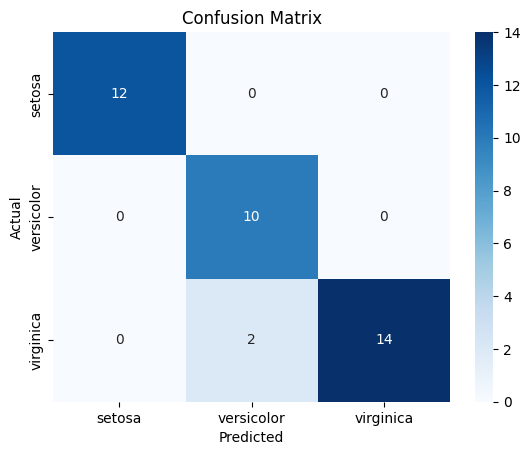

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()